In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/goodbooks-10k/book_tags.csv
/kaggle/input/goodbooks-10k/ratings.csv
/kaggle/input/goodbooks-10k/books.csv
/kaggle/input/goodbooks-10k/sample_book.xml
/kaggle/input/goodbooks-10k/to_read.csv
/kaggle/input/goodbooks-10k/tags.csv


# Importing Data

In [4]:
books= pd.read_csv('/kaggle/input/goodbooks-10k/books.csv',error_bad_lines = False)

In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books.shape

(10000, 23)

In [7]:
ratings = pd.read_csv('/kaggle/input/goodbooks-10k/ratings.csv')

ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [8]:
tags = pd.read_csv('/kaggle/input/goodbooks-10k/book_tags.csv')
tags.tail()

,goodreads_book_id,tag_id,count
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [9]:
btags = pd.read_csv('/kaggle/input/goodbooks-10k/tags.csv')
btags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


# Cleaning the data, removing duplicates

In [10]:
ratings=ratings.sort_values("user_id")
ratings.shape

(981756, 3)

In [11]:
ratings.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
ratings.shape

(977269, 3)

Therefore, 4487 duplicates were present in the data, that have been removed.

Lets check for the books dataset as well.

In [13]:
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

(10000, 23)
(9151, 23)


849 rows removed.

In [14]:
print(btags.shape)
btags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
print(btags.shape)

(34252, 2)
(34252, 2)


Cool, so there are no duplicates in the book_tags dataset.

In [15]:
print(tags.shape)
tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
print(tags.shape)

(999912, 3)
(999896, 3)


# Visualizing data

In [16]:
joint_tags=pd.merge(tags,btags,left_on='tag_id',right_on='tag_id',how='inner')

Top 10 rated books

In [17]:
top_rated=books.sort_values('average_rating', ascending=False)
top10=top_rated.head(10)
f=['title','small_image_url']
displ=(top10[f])
displ.set_index('title', inplace=True)


In [18]:
from IPython.display import Image, HTML

def path_to_image_html(path):
    return '<img src="'+ path + '""/>'

HTML(displ.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
The Complete Calvin and Hobbes,
"Words of Radiance (The Stormlight Archive, #2)",
Mark of the Lion Trilogy,
It's a Magical World: A Calvin and Hobbes Collection,
There's Treasure Everywhere: A Calvin and Hobbes Collection,
"Harry Potter Boxset (Harry Potter, #1-7)",
"Harry Potter Collection (Harry Potter, #1-6)",
The Indispensable Calvin and Hobbes,
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,


**Top 10 most popular books**

In [19]:
pop10=books.sort_values(by='ratings_count', ascending=False)
f=['title','small_image_url']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')

In [20]:
HTML(pop10.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
"The Hunger Games (The Hunger Games, #1)",
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
To Kill a Mockingbird,
The Great Gatsby,
The Fault in Our Stars,
The Hobbit,
The Catcher in the Rye,
Pride and Prejudice,
"Angels & Demons (Robert Langdon, #1)",


**Most Common Rating Values**

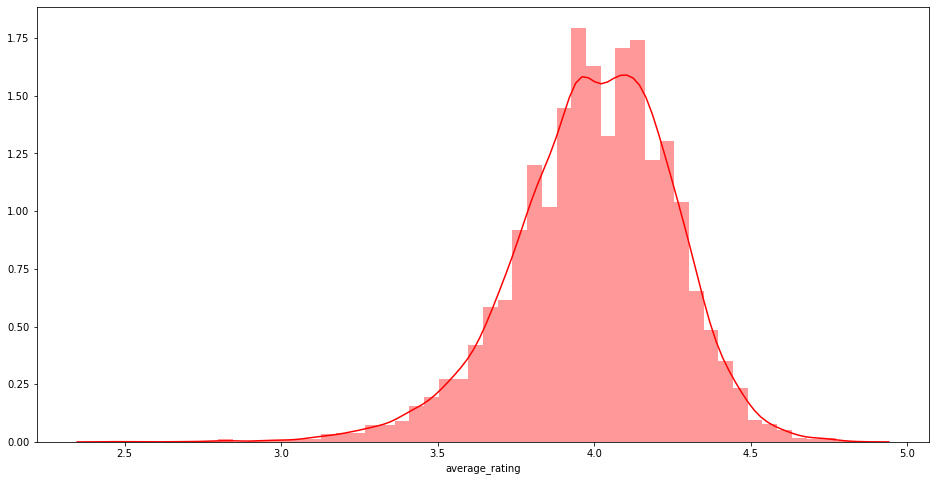

In [21]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

Therefore, the most common rating is somewhere between 3.5 to 4.

In [22]:
no_of_ratings_per_book=ratings.groupby('book_id').count()

In [23]:
no_of_ratings_per_book

,user_id,rating
book_id,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
9996,96,96
9997,89,89
9998,95,95


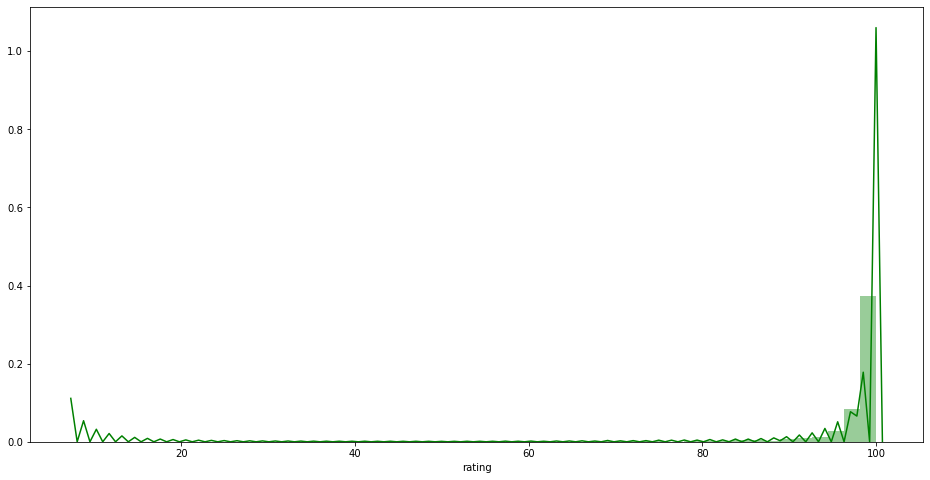

In [24]:
plt.figure(figsize=(16,8))
sns.distplot(a=no_of_ratings_per_book['rating'], color='g')

It is seen that most books have count of ratings greater than 80. That is alot of audience.

**Highly rated authors**

In [25]:
books.head(2)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [26]:
f=['authors', 'average_rating']
top_authors=top_rated[f]
top_authors=top_authors.head(20)

In [27]:
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

In [28]:
p=joint_tags.groupby('tag_name').count()

In [29]:
p=p.sort_values(by='count', ascending=False)
p

,goodreads_book_id,tag_id,count
tag_name,,,
to-read,9983,9983,9983
favorites,9881,9881,9881
owned,9856,9856,9856
books-i-own,9799,9799,9799
currently-reading,9776,9776,9776
...,...,...,...
hs,1,1,1
hrabal,1,1,1
hq-manga,1,1,1


In [30]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

In [31]:
new_tags=p[p.index.isin(genres)]

In [32]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=new_tags['count'],
            y=new_tags.index,
            orientation='h'))

fig.show()

In [33]:
fig = px.line(books, y="books_count", x="average_rating", title='Book Count VS Average Rating')
fig.show()

In [34]:
dropna= books.dropna()
fig = px.treemap(dropna, path=['original_publication_year','language_code', "average_rating"],
                  color='average_rating')
fig.show()

Thus, a lot of books were publish in the year 2011, and most of them were in English.

**Do readers prefer short titles or long titles?**

In [35]:
books['length-title']=books['original_title'].str.len()

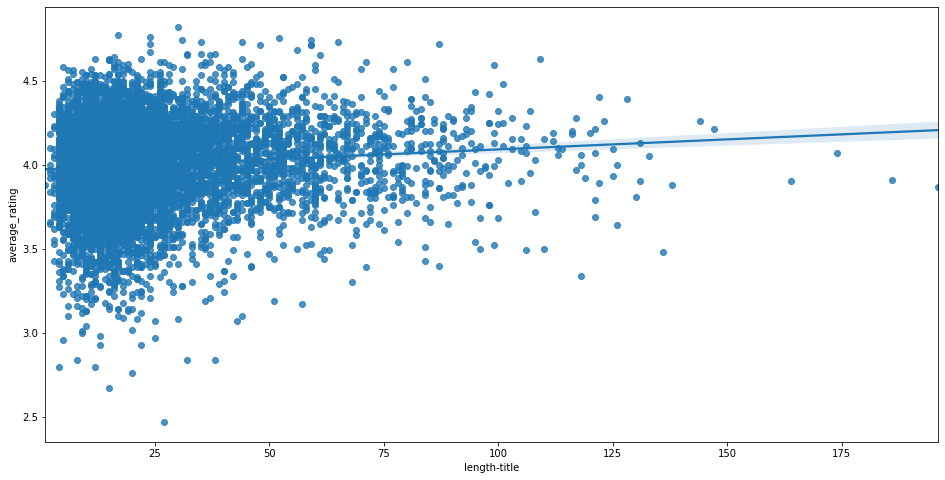

In [36]:
plt.figure(figsize=(16,8))
sns.regplot(x=books['length-title'], y=books['average_rating'])

So, the highly rated books have rather short titles. The graph shows that a straight line can be plotted but very approximately to say that as the length of title increases, the rating remains constant (at around 4).

**Word Cloud for tags used by readers.**

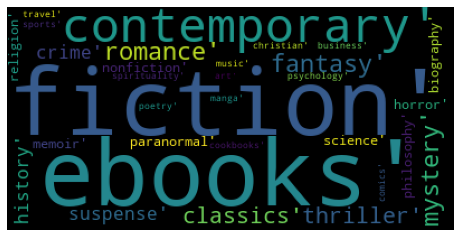

In [37]:
from wordcloud import WordCloud, STOPWORDS 
text = new_tags.index.values 

wordcloud = WordCloud().generate(str(text))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [38]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'length-title'],
      dtype='object')

In [39]:
to_read=pd.read_csv("/kaggle/input/goodbooks-10k/to_read.csv")
to_r= books.merge(to_read, left_on='book_id', right_on='book_id', how='inner')

In [40]:
to_r=to_r.groupby('original_title').count()

In [41]:
to_r=to_r.sort_values(by='id', ascending=False)
to_r20=to_r.head(20)

**Top Books users want to read**

In [42]:
fig = px.bar(to_r20, x=to_r20.index, y='id', color ='id')
fig.show()

Analysis of number of books in "to read" category of a user.

In [43]:
to_read1=to_read.groupby('user_id').count()

In [44]:
from collections import Counter
c=Counter(list(to_read1['book_id']))

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=list(c.keys()), y=list(c.values()),
    mode='markers')
])

fig.show()

# Recommendation System

![Recco](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/67630/versions/6/screenshot.png)

A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. There are two types of recommendation systems:
* Content Based : This approach analyzes the available content and find similarities between them and then recommendations the items obtained that have a high similarity.
* Collaborative : This approach mines or analyzes the information about users who prefer the same content and recommend the items that similar users prefer.

# 1. Content Based

Content based filtering on the following factors:

1. Title
2. Authors
3. Average rating


![Content based diagram](https://miro.medium.com/max/828/1*1b-yMSGZ1HfxvHiJCiPV7Q.png)

In [46]:
fillnabooks= books.fillna('')

Cleaning the data - making all the words lower case

In [47]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Only extracting features from given data,

In [48]:
features=['original_title','authors','average_rating']
fillednabooks=fillnabooks[features]

In [49]:
fillednabooks = fillednabooks.astype(str)
fillednabooks.dtypes

original_title    object
authors           object
average_rating    object
dtype: object

In [50]:
for feature in features:
    fillednabooks[feature] = fillednabooks[feature].apply(clean_data)
    
fillednabooks.head(2)

,original_title,authors,average_rating
0,thehungergames,suzannecollins,4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44


Creating a "soup" or a "bag of words" for all rows.

In [51]:
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']

In [52]:
fillednabooks['soup'] = fillednabooks.apply(create_soup, axis=1)

Importing count vectorizer for term frequencies.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillednabooks['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [54]:
fillednabooks=fillednabooks.reset_index()
indices = pd.Series(fillednabooks.index, index=fillednabooks['original_title'])

In [55]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return list(books['original_title'].iloc[movie_indices])

In [56]:
l=get_recommendations_new('The Hobbit', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

In [57]:
l=get_recommendations_new('Harry Potter and The Chamber of Secrets', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

# 2. Collaborative Filtering

While i was learning about collaborative recommendation systems, I noticed that a lot of kernels here on kaggle are really just content based recommendation systems but are titled as collaborative. 

![Collaborative Filtering](https://cdn-images-1.medium.com/max/1000/0*gJ8CeGoD9IAHzSmb.png)

To explain collaborative filtering in simple words, consider the above users- User A and User B. 
User A and User B are considered similar users because they often bought similar or the same books in the past. Now, User A bought the Deep Learning and Neural Networks books. Therefore, when User B browses for books, he will be recommended Deep Learning and Neural Networks because User A( who User B has common interests with) bought those.

This data is very messy so dropping null values is crucial.

In [58]:
usecols=['book_id', 'original_title']
books_col=books[usecols]

In [60]:
books_col.dropna()

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
5,11870085,The Fault in Our Stars
...,...,...
9995,7130616,Bayou Moon
9996,208324,Means of Ascent
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


Creating Compressed sparse row matrix

In [61]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_book_features = ratings.pivot(index='book_id',columns='user_id',values='rating').fillna(0)
mat_book_features = csr_matrix(df_book_features.values)

In [62]:
df_book_features.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, K nearest neighbors algorithm is used to find the nearest book with least distance available.

In [63]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)


num_users = len(ratings.user_id.unique())
num_items = len(ratings.book_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 53380 unique users and 10000 unique movies in this data set


In [64]:
ratings=ratings.dropna()

In [65]:
df_ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head(10)

,count
rating,
1,19485
2,63010
3,247698
4,355878
5,291198


In [66]:
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,532822731
1.0,19485
2.0,63010
3.0,247698
4.0,355878
5.0,291198


After counting all ratings, it is observed that a large amount of books are rated 0 or are unrated. These need to go!

Text(0, 0.5, 'number of ratings')

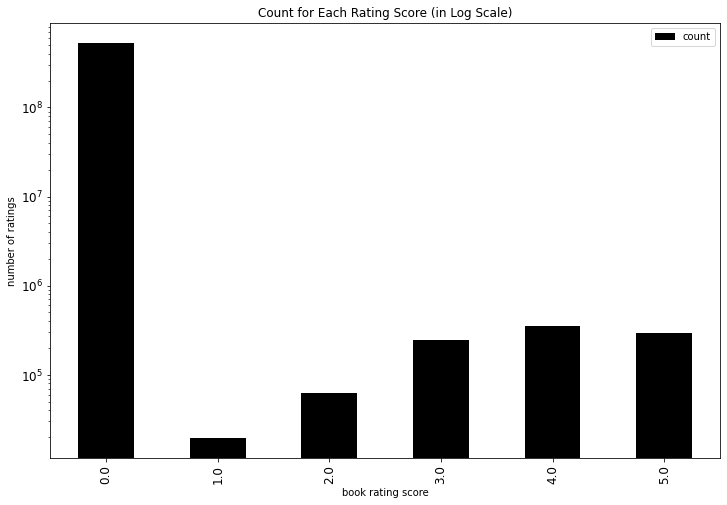

In [67]:
import numpy as np
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

import matplotlib.pyplot as plt


get_ipython().run_line_magic('matplotlib', 'inline')
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,color='black'
)
ax.set_xlabel("book rating score")
ax.set_ylabel("number of ratings")



Graph clearly shows that a lot of data is irrevelant and can be removed.

In [68]:
df_books_cnt = pd.DataFrame(ratings.groupby('book_id').size(), columns=['count'])
df_books_cnt.head()

,count
book_id,
1,100
2,100
3,100
4,100
5,100


In [69]:
#now we need to take only books that have been rated atleast 60 times to get some idea of the reactions of users towards it

popularity_thres = 60
popular_movies = list(set(df_books_cnt.query('count >= @popularity_thres').index))
df_ratings_drop = ratings[ratings.book_id.isin(popular_movies)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop.shape)

shape of original ratings data:  (977269, 3)
shape of ratings data after dropping unpopular movies:  (975605, 3)


In [70]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

,count
user_id,
1,3
2,3
3,2
4,3
5,5


Dropping users who have rated less than 50 times

In [71]:
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop[df_ratings_drop.user_id.isin(active_users)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)


shape of original ratings data:  (977269, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (417687, 3)


In [72]:
book_user_mat = df_ratings_drop_users.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
book_user_mat

user_id,7,35,41,75,119,143,145,153,158,173,...,53245,53279,53281,53292,53293,53318,53352,53366,53373,53381
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:

book_user_mat_sparse = csr_matrix(book_user_mat.values)


In [74]:
book_user_mat_sparse

<9886x4892 sparse matrix of type '<class 'numpy.float64'>'
	with 417687 stored elements in Compressed Sparse Row format>

Fitting the model

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(book_user_mat_sparse)

![](https://www.researchgate.net/profile/Bouikhalene_Belaid/publication/286477914/figure/fig3/AS:357048207331339@1462138334848/The-Majority-Voting-KNN-K6.png)

Using fuzzy logic to get nearest distance.

The term fuzzy refers to things which are not clear or are vague.In boolean system truth value, 1.0 represents absolute truth value and 0.0 represents absolute false value. But in the fuzzy system, there is no logic for absolute truth and absolute false value. But in fuzzy logic, there is intermediate value too present which is partially true and partially false.


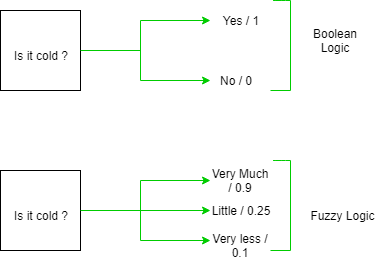

In [76]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_book, verbose=True):
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

Writing the recommendation function.

In [77]:
def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input book:', fav_book)
    idx = fuzzy_matching(mapper, fav_book, verbose=True)
    
    print('Recommendation system starting to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends =         sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_book))
    rec=[]
    for i, (idx, dist) in enumerate(raw_recommends):
        if idx not in reverse_mapper.keys():
            continue
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))
        rec.append(reverse_mapper[idx])
    return rec

Time to check!

In [78]:
my_favorite = 'To Kill a Mockingbird'
indices = pd.Series(books_col.index, index=books_col['original_title'])

In [79]:
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book=my_favorite,
    mapper=indices,
    n_recommendations=10)

You have input book: To Kill a Mockingbird
Found possible matches in our database: ['To Kill a Mockingbird', 'Mockingbird', 'Stolen Songbird']

Recommendation system starting to make inference
......

Recommendations for To Kill a Mockingbird:
1: Lord of the Flies , with distance of 0.45598309432313877
2: Little Women, with distance of 0.4526896099993938
3: Nineteen Eighty-Four, with distance of 0.4396460119625992
4: Memoirs of a Geisha, with distance of 0.43283216907946764
5: Animal Farm: A Fairy Story, with distance of 0.4252435075403517
6: Pride and Prejudice, with distance of 0.4251608152166305
7: Of Mice and Men , with distance of 0.4204446294803902
8: Harry Potter and the Philosopher's Stone, with distance of 0.3892592020883805
9: The Catcher in the Rye, with distance of 0.3699905318987523
10: The Great Gatsby, with distance of 0.2966652339964868


['Lord of the Flies ',
 'Little Women',
 'Nineteen Eighty-Four',
 'Memoirs of a Geisha',
 'Animal Farm: A Fairy Story',
 'Pride and Prejudice',
 'Of Mice and Men ',
 "Harry Potter and the Philosopher's Stone",
 'The Catcher in the Rye',
 'The Great Gatsby']

In [80]:
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Harry Potter and the Chamber of Secrets',
    mapper=indices,
    n_recommendations=10)

You have input book: Harry Potter and the Chamber of Secrets
Found possible matches in our database: ['Harry Potter and the Chamber of Secrets', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Chamber of Secrets: Sheet Music for Flute with C.D', 'Gregor and the Marks of Secret', 'Harry Potter and the Prisoner of Azkaban', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Deathly Hallows', 'Haroun and the Sea of Stories', "James Potter and the Hall of Elders' Crossing ", 'Harry Potter and the Cursed Child, Parts One and Two', 'Peter and the Shadow Thieves']

Recommendation system starting to make inference
......

Recommendations for Harry Potter and the Chamber of Secrets:
1: The Return of the King, with distance of 0.5137453857083071
2: Mockingjay, with distance of 0.484811069871498
3: The Da Vinci Code, with distance of 0.48437188831920774
4: Catching Fire, with distanc

['The Return of the King',
 'Mockingjay',
 'The Da Vinci Code',
 'Catching Fire',
 "Harry Potter and the Philosopher's Stone",
 'Harry Potter and the Deathly Hallows',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Prisoner of Azkaban']

In [81]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Gone Girl',
    mapper=indices,
    n_recommendations=10)

You have input book: Gone Girl
Found possible matches in our database: ['Gone Girl', 'Gone ', 'Roller Girl', 'Nature Girl', 'Gossip Girl', 'The Goose Girl', 'Ghostgirl', 'Vinegar Girl', 'The Good Girl', 'Twenties Girl', 'Candy Girl', 'Metro Girl', 'Funny Girl', 'Agnes Grey', 'Boy Meets Girl', 'Love, Stargirl', 'The House Girl', 'Silver Girl', 'Wintergirls']

Recommendation system starting to make inference
......

Recommendations for Gone Girl:
1: The Giver, with distance of 0.6158197177191762
2: Memoirs of a Geisha, with distance of 0.6111717525594234
3: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, with distance of 0.6074993104114255
4: The Night Circus, with distance of 0.6055880373834424
5: O Alquimista, with distance of 0.6029134027522959
6: The Fault in Our Stars, with distance of 0.6004559014025481
7: The Devil in the White City: Murder, Magic, and Madness at the Fair that Changed America, with distance of 0.5960388200819615
8: A Game of T

In [82]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Divergent',
    mapper=indices,
    n_recommendations=10)

You have input book: Divergent
Found possible matches in our database: ['Divergent', 'Evergreen', 'Driven', 'Insurgent', 'Descent', 'Deliverance']

Recommendation system starting to make inference
......

Recommendations for Divergent:
1: Mockingjay, with distance of 0.6368451672358991
2: Catching Fire, with distance of 0.6317072362567975
3: Insurgent, with distance of 0.6143238462674122
4: The Giver, with distance of 0.608207539785535
6: The Perks of Being a Wallflower, with distance of 0.6017219498552195
7: The Book Thief, with distance of 0.5813217330602747
8: The Lightning Thief, with distance of 0.5660509401292786
9: Gone Girl, with distance of 0.5627069805246723
10: The Fault in Our Stars, with distance of 0.41485257342792325


In [83]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Kafka on the Shore',
    mapper=indices,
    n_recommendations=10)

You have input book: Kafka on the Shore
Found possible matches in our database: ['And the Shofar Blew', 'A Fraction of the Whole', 'Halfway to the Grave', 'Salt to the Sea', 'The Farthest Shore', 'A Map of the World', 'In Her Shoes']

Recommendation system starting to make inference
......

Recommendations for Kafka on the Shore:
1: Morgawr , with distance of 0.6555631323101632
2: The Woman Upstairs, with distance of 0.6127869510454468
3: Porno, with distance of 0.43176022797613023
4: The Hurricane Sisters , with distance of 0.4050860398093705
5: The Endurance: Shackleton's legendary Antarctic expedition, with distance of 0.393458565796727
6: Chill Factor, with distance of 0.288231688746155
8: Darkness, Be My Friend, with distance of 0.17858194650445824


In [84]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Kafka on the Shore',
    mapper=indices,
    n_recommendations=10)

You have input book: Kafka on the Shore
Found possible matches in our database: ['And the Shofar Blew', 'A Fraction of the Whole', 'Halfway to the Grave', 'Salt to the Sea', 'The Farthest Shore', 'A Map of the World', 'In Her Shoes']

Recommendation system starting to make inference
......

Recommendations for Kafka on the Shore:
1: Morgawr , with distance of 0.6555631323101632
2: The Woman Upstairs, with distance of 0.6127869510454468
3: Porno, with distance of 0.43176022797613023
4: The Hurricane Sisters , with distance of 0.4050860398093705
5: The Endurance: Shackleton's legendary Antarctic expedition, with distance of 0.393458565796727
6: Chill Factor, with distance of 0.288231688746155
8: Darkness, Be My Friend, with distance of 0.17858194650445824


Thus, the model looks and works perfectly good.